In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd


bins = 32
with open ('calibration.npy', 'rb') as f:
    hmatrix = np.load(f)
    left_g_int = np.load(f)
    left_r_int = np.load(f)
    right_g_int = np.load(f)
    right_r_int =np.load(f)

with open('frame.npy', 'rb') as f:
    test_frame = np.load(f)

with open('segmented.npy', 'rb') as f:
    segmented = np.load(f)

print(hmatrix.shape,left_g_int.shape,left_r_int.shape,right_g_int.shape,right_r_int.shape,test_frame.shape, segmented.shape)
hmatrix1d = hmatrix.flatten()

(32, 32) (30, 30) (30, 30) (30, 30) (30, 30) (720, 1280, 3) (240, 427)


In [88]:
segment_xlsx = pd.DataFrame(segmented)
segment_xlsx.to_excel('visualization/segmented.xlsx', index=False)
hmatrix_xlsx = pd.DataFrame(hmatrix)
hmatrix_xlsx.to_excel('visualization/hmatrix.xlsx', index=False)

In [89]:
res = np.where(hmatrix == 490)
print(res)

(array([16]), array([1]))


In [90]:
def image_segmentation(frame):
    # RG chromaticity of frame
    np.seterr(invalid='ignore')
    I = frame.sum(axis=2)
    I[I == 0] = 100000

    frame_r = frame[:,:,2] / I
    frame_g = frame[:,:,1] / I
    
    frame_r_int = (frame_r*(bins-1)).astype(int)
    frame_g_int = (frame_g*(bins-1)).astype(int)

    back_projection = np.zeros(frame_r.shape, dtype = 'uint8')
    back_projection = hmatrix1d[frame_g_int.flatten()*bins + frame_r_int.flatten()].reshape(frame_r.shape)
    
    #masked = cv2.bitwise_and(frame, frame, mask = back_projection)

    return hmatrix, back_projection

In [101]:
def blob_detection(frame):
    plt.imshow(frame)
    plt.show()
    _, thresh = cv2.threshold(frame, 30, 255, cv2.THRESH_BINARY)
    #print(thresh.shape)
    _, contours, _ =cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        

    M = cv2.moments(thresh)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    plt.imshow(thresh)
    plt.show()
    return cX, cY

In [98]:
frame_width = 640
frame_height = 480
hmatrix, back_proj = image_segmentation(test_frame)
conv = back_proj.astype(np.uint8)
print(np.where(hmatrix == np.amax(back_proj)))
#pd.DataFrame(back_proj).to_excel('visualization/back_proj.xlsx', index=False)
#pd.DataFrame(conv).to_excel('visualization/conv.xlsx', index=False)
#display = np.concatenate((test_frame, segmented), axis = 0)

#title = "Main Detection"
#plt.imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
#plt.show()


(array([16]), array([1]))


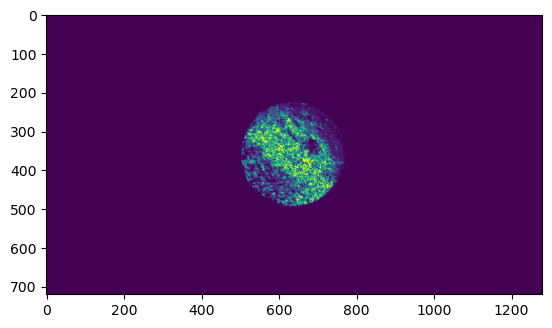

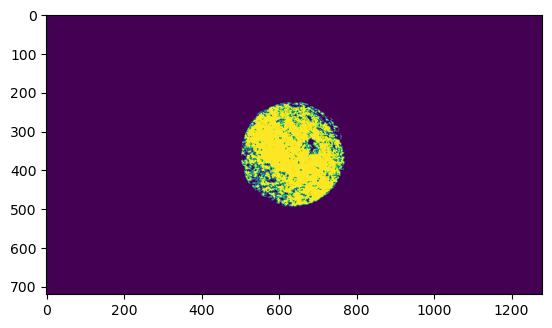

In [102]:
cX, cY = blob_detection(back_proj)

# put text and highlight the center
#cv2.circle(segmented, (cX, cY), 5, (255, 255, 255), -1)
#cv2.putText(segmented, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
#plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
#plt.show